## Ames Iowa Housing Trends Analysis

By: Feiran Zhang and Samridhi Verma

## 1. Introduction

#### Our team chose the Ames, Iowa Housing Dataset which is about resendential home sales in Iowa between 2006 to 2010 and the dataset includes other properties about the houses. 


#### The motiavtion to choose this dataset was because we wanted to analyze at what could be the housing cost for living in a city of Iowa. Also, it has been found that Ames's housing expenses are 5% lower than the national average and the utility prices are 20% lower than the national average. (https://www.payscale.com/cost-of-living-calculator/Iowa-Ames).

#### Additionally, the motiavtion behind choosing this dataset is to be able to provide interested buyers of these houses, the trends on the basis of various factors.

In [ ]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Ames = pd.read_csv('ames.csv')

In [ ]:
#our dataset
Ames

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### To make our analysis easier as we move further. We'll get rid of the of the null values and clean our dataset.

In [ ]:
Ames.isna().sum()

Order               0
PID                 0
MS.SubClass         0
MS.Zoning           0
Lot.Frontage      490
                 ... 
Mo.Sold             0
Yr.Sold             0
Sale.Type           0
Sale.Condition      0
SalePrice           0
Length: 82, dtype: int64

In [ ]:
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   MS.Zoning        2930 non-null   object 
 4   Lot.Frontage     2440 non-null   float64
 5   Lot.Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot.Shape        2930 non-null   object 
 9   Land.Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot.Config       2930 non-null   object 
 12  Land.Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition.1      2930 non-null   object 
 15  Condition.2      2930 non-null   object 
 16  Bldg.Type        2930 non-null   object 
 17  House.Style   

#### After observing the information above, we would like to drop all the columns that have less than 1000 non-null values. 

In [ ]:
Ames_new = Ames.drop(columns = ['Pool.QC', 'Alley', 'Fence', 'Misc.Feature'])
Ames_new

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,...,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [ ]:
Ames_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   MS.Zoning        2930 non-null   object 
 4   Lot.Frontage     2440 non-null   float64
 5   Lot.Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual  

In [ ]:
Ames_new = Ames_new.dropna()
Ames_new

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,...,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,140000
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,160000
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,131000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [ ]:
Ames_new.columns = Ames_new.columns.str.replace(".","_", regex=False)
Ames_new

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,140000
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,160000
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,131000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


## **2. Descriptive Analytics**

#### **Research Question** - For this part, we wanted to analyse the Sale price of the Ames houses for the period of 5 years. Along with that, how strong the relationship is between Sale price and Sale Condition. Furthermore, what can we observe about these two variables with Year Sold.

#### In this section, we are going to visualize the Sale Price variable and learn about its summary statistics. Also, we analyze its relationship with the sale condition variable.

#### Moving further, we also wished to see how our Sale Price varies with Sale condition and in the year which they were sold. 

### **Visualization for a single numerical variable - Sale Price**.


## Histogram

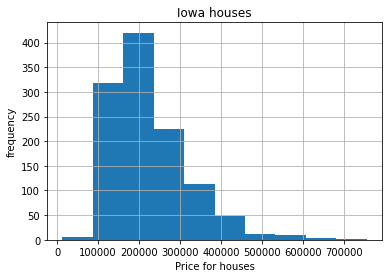

In [ ]:
Ames_new['SalePrice'].hist()
plt.xlabel("Price for houses")
plt.ylabel("frequency")
plt.title("Iowa houses")

plt.show()

#### The histogram shows that there is a lot of skewness towards the right. Hence, we could suggest that our average sale price is greater than the median of prices. To look further we'll analyse it further using summary statictics.

#### Summary Statistics

In [ ]:
def summary(argument):
  index = ['min', 'q1', 'median', 'Q3', 'max', 'mean', 'std']
  value = [argument.min(),
           argument.quantile(q=0.25),
           argument.median(), 
           argument.quantile(0.75), 
           argument.max(), 
           argument.mean(), 
           argument.std()]
  return pd.DataFrame({'value': value}, index= index)

In [ ]:
summary(Ames_new['SalePrice'])

,value
min,12789.000000
q1,157500.000000
median,194450.500000
Q3,264974.500000
max,755000.000000
mean,223057.326125
std,93280.564462


#### The summary statistics table shows the average price of the house is about 223057 Dollars, and the maximum price has gone upto high of 755000 which has quite a lot of difference from the average price. Hence, our inference above was right

#### Moving forward, to visualize the measure

Violinplot showing the sale price of Iowa houses


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


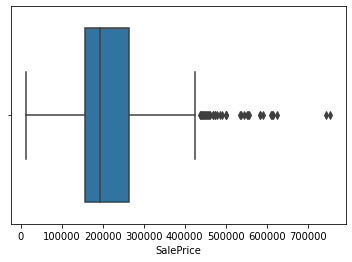

In [ ]:
print('Violinplot showing the sale price of Iowa houses')
sns.boxplot(Ames_new['SalePrice'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


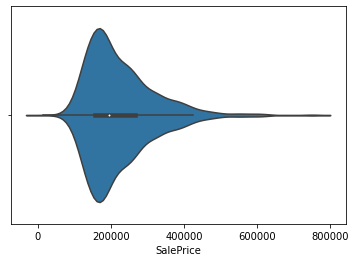

In [ ]:
sns.violinplot(Ames_new['SalePrice'])
plt.show()

#### As we can observe a lot of outliers in the Sale Price it would be best to take median as centre of measure than its mean for this dataset.

In [ ]:
Ames_new['Sale_Condition'].value_counts() #types of Sale condition


Normal     929
Partial    154
Abnorml     49
Family      19
Alloca       5
Name: Sale_Condition, dtype: int64

In [ ]:
Ames_new['Yr_Sold'].value_counts() #Different Year Sold in the dataset

2007    292
2009    259
2006    249
2008    231
2010    125
Name: Yr_Sold, dtype: int64

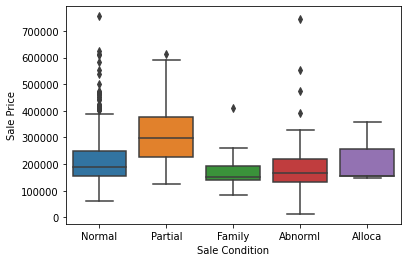

In [ ]:
sns.boxplot(x='Sale_Condition', y = 'SalePrice', data = Ames_new)
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()

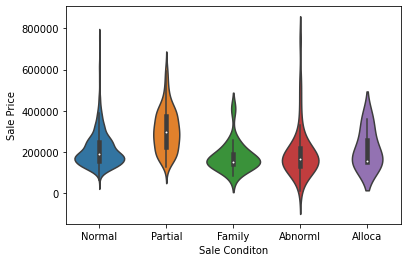

In [ ]:
sns.violinplot(x='Sale_Condition', y = 'SalePrice', data = Ames_new)
plt.xlabel('Sale Conditon')
plt.ylabel('Sale Price')
plt.show()

### How does relationship change with the Year Sold.

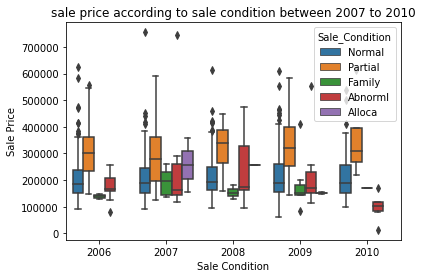

In [ ]:
sns.boxplot(x = 'Yr_Sold', y = 'SalePrice',  hue = 'Sale_Condition', data = Ames_new) 
plt.title('sale price according to sale condition between 2007 to 2010')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()

## 3. Inference

Inference for the Difference Between Two Population Means


**Research Question:** Is there any association in the average Sale Price difference for two different Lot Shape?

we would like to determine if we have sufficient evidence to suggest that the average salesprice of all property sold in Iowa in REG lot.shape is different from the average salesprice of all property sold in Iowa in IR1 lot.shape.

####3.1 Hypotheses

$H_0: \mu_{REG} - \mu_{IR1} = 0$     



$H_1: \mu_{REG} - \mu_{IR1} \neq 0$  

####3.2 Data Processing

In [ ]:
reg_df = Ames_new[Ames_new['Lot_Shape'] == 'Reg']
reg_df

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000
13,14,527180040,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,171500
17,18,527258010,20,RL,88.0,11394,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,New,Partial,394432
19,20,527302110,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,140000
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,160000
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,131000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [ ]:
ir1_df = Ames_new[Ames_new['Lot_Shape'] == 'IR1']
ir1_df #we could use all the IR together in 

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
10,11,527163010,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,175900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,2885,911370530,120,RM,44.0,3842,Pave,IR1,HLS,AllPub,...,0,0,155,0,0,12,2006,WD,Normal,300000
2885,2886,913350030,20,RL,69.0,23580,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Normal,242500
2891,2892,916225130,60,RL,42.0,26178,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,335000
2895,2896,916402125,20,RL,54.0,13811,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2006,WD,Normal,176000


In [ ]:
sample_mean_price_diff = reg_df['SalePrice'].mean() - ir1_df['SalePrice'].mean()
sample_mean_price_diff 

-51282.132674881024

In [ ]:
sample_std = np.sqrt(((reg_df['SalePrice'].std()**2)/689) + ((ir1_df['SalePrice'].std()**2)/431))
sample_std

5644.555209704696

####3.3 Conditions for Inference

Next, check the conditions for conducting inference on $\mu_{REG} - \mu_{IR1}$  below. 

$n_{REG} \ge 30$

$n_{IR1} \ge 30$

$n_{REG} < 10$% of population of size 1

$n_{IR1} < 10$% of population of size 2

Sample_tech and Sample_nontech are independent.

####3.4 Creating a 95% Confidence Interval

In [ ]:
critical_value = t.ppf(0.975, df = 30)
critical_value

2.0422724563012373

In [ ]:
point_estimate = sample_mean_price_diff
point_estimate 

-51282.132674881024

In [ ]:
standard_error = sample_std
standard_error

5644.555209704696

In [ ]:
lower_bound = point_estimate - critical_value*standard_error 
upper_bound = point_estimate + critical_value*standard_error 
print("95% confidence interval: ",lower_bound, upper_bound)

95% confidence interval:  -62809.85230773258 -39754.41304202947


####3.5 p-value

In [ ]:
test_stat = (point_estimate -0)/standard_error

In [ ]:
pvalue = 2*(1-t.cdf(np.abs(test_stat),df = 978))

In [ ]:
print('p-value:',pvalue)

p-value: 0.0


####3.6 Conclusion for the Hypothesis.

Because that null value is not inside our 95% confidence interval, and p-value less than a significance level of $\alpha = 0.05$, we reject the null hypotheses. Thus we have sufficient evidence to suggest that $\mu_{REG} - \mu_{IR1} \neq 0$.

## 4. Linear Regression

#### **Research question** - How does our response variable, Sale Price change with the Year Sold, Lot Frontage, Lot Area and the Street. Is there a linear association?

#### This section would the buyers in the market understand how this model could best predict the price of house they wish to buy in Ames Iowa based on various factors like lot frontage, lot area, and the street on which it is located


#### Further, we will also analyse which of the slopes could be the zero and also calculate predications based on our model

#### Our linear regression model including Sale Price as our response variable. The explanatory varibles would include:
1. Lot Frontage
2. Lot Area
3. Year Sold
4. Street

In [ ]:
final = smf.ols('SalePrice ~ Yr_Sold + Lot_Area + Lot_Frontage + Street', data = Ames_new).fit()
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     41.62
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.27e-32
Time:                        14:22:11   Log-Likelihood:                -14790.
No. Observations:                1156   AIC:                         2.959e+04
Df Residuals:                    1151   BIC:                         2.962e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.932e+06   3.94e+06      0.490      0.624   -5.81e+06    9.67e+06
Street[T.Pave]  1.125e+05    6.2e+04      1.813      0.070   -9221.672    2.34e+05
Yr_Sold         -951.0003   1965.063     -0.484      0.629   -4806.507    2904.507
Lot_Area           2.0365      0.341      5.972      0.000       1.367       2.706
Lot_Frontage     888.9700    110.348      8.056      0.000     672.463    1105.477
==============================================================================
Omnibus:                      258.579   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.207
Skew:                           1.164   Prob(JB):                    2.40e-147
Kurtosis:                       5.932   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Formulating the multiple linear regression line




$ [SalePrice]  =  (-1236.93 * [Yr.Sold]  + 1.153e+05 * [Street[T.Pave]] + 950.99 * [Lot Frontage] + 2.5290 * [Lot Area] + 2.458e+06)$

#### If the explanatory variables were all 0, we would expect the response variable value, on average, to be 2.458𝑒+06.

### Interpreting the slopes
#### 1.  All else held equal, if we were to increase the Yr.Sold by 1, then on average, we would expect the response value to increase by negative 1236.93
#### 2.  All else held equal, if we were to increase Lot.Frontage by 1, then on average, we would expect the response value to increase by 950.99.
#### 3.  All else held equal, if we were to increase Lot.Area by 1, then on average, we would expect the response value to increase by 2.5290.
#### 4.  All else held equal, we would expect the difference in average response variable valuefor those observations in the indicator level of Street and those observations in the reference level is 1.153e+05.

### **Conditions for Inference on Multiple Linear Regression**

### **1. Linearity Condition**
#### The amount of points above and below the line look almost equal hence the linearity condition is met.

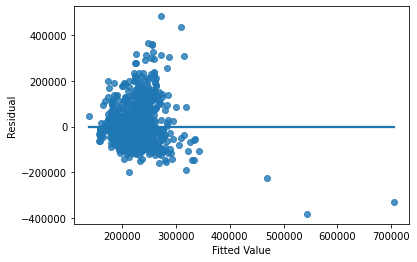

In [ ]:
sns.regplot(x = final.fittedvalues, y = final.resid, ci = None) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### **2. Constant Variablity of residuals condition**
#### y-axis spread of points changes to some extent as we move ahead hence the condition is not quite met

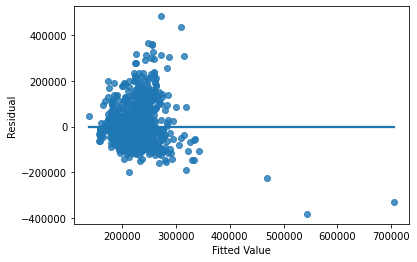

In [ ]:
sns.regplot(x = final.fittedvalues, y = final.resid, ci = None) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### **3. Normality or residuals condition**
#### It does not appear exactly normal and hence condition is not met.

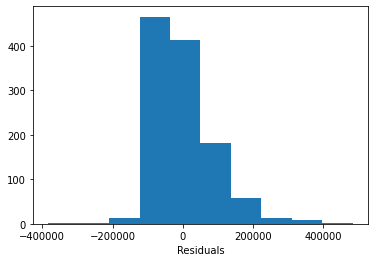

In [ ]:
plt.hist(final.resid)
plt.xlabel('Residuals')
plt.show()

#### **4. Independence of residuals condition**

#### 1. Data is randomly sampled
#### 2. Sample size is less than 10% of the total

#### Conditions may not be violated as we don't have enough information about the independence of the variables. 

### **5. No-Multicollinearity Condition - Conditions may be violated since we see a moderately strong relationship between two collinearity variables.** 

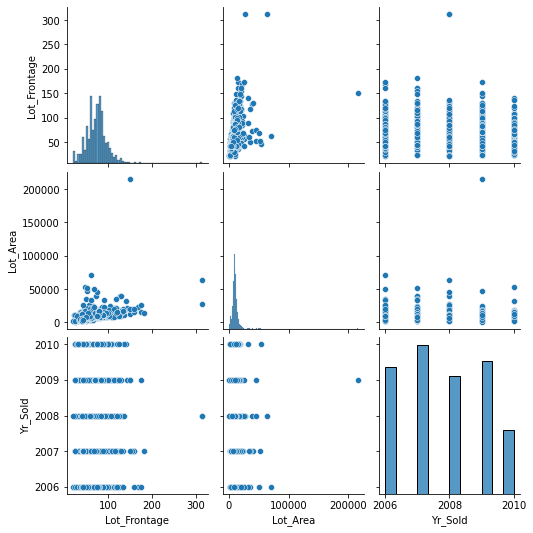

In [ ]:
sns.pairplot(Ames_new[['Lot_Frontage', 'Lot_Area', 'Yr_Sold']]) 

### Model fit
#### The percent of variability of the Sale price of the model is 16.4%. It is the r-squared value of the model.

### Linear Transformation

In [ ]:
Ames_new['Log_SalePrice'] = np.log(Ames_new['SalePrice'])
Ames_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Log_SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,5,2010,WD,Normal,215000,12.278393
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,4,2010,WD,Normal,244000,12.404924
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,3,2010,WD,Normal,189900,12.154253
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,6,2010,WD,Normal,195500,12.183316
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,3,2010,WD,Normal,236500,12.373703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,0,5,2006,WD,Normal,140000,11.849398
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,...,0,0,0,0,5,2006,WD,Normal,160000,11.982929
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,9,2006,WD,Abnorml,131000,11.782953
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,4,2006,WD,Normal,170000,12.043554


In [ ]:
final2 = smf.ols('Log_SalePrice ~ Yr_Sold + Lot_Frontage + Lot_Area + Street', data = Ames_new).fit()
final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_SalePrice   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     40.63
Date:                Fri, 13 May 2022   Prob (F-statistic):           7.03e-32
Time:                        14:22:18   Log-Likelihood:                -465.77
No. Observations:                1156   AIC:                             941.5
Df Residuals:                    1151   BIC:                             966.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.6448     16.387      1.504      0.133      -7.507      56.797
Street[T.Pave]     0.4407      0.258      1.710      0.087      -0.065       0.946
Yr_Sold           -0.0066      0.008     -0.806      0.420      -0.023       0.009
Lot_Frontage       0.0038      0.000      8.266      0.000       0.003       0.005
Lot_Area        7.816e-06   1.42e-06      5.518      0.000    5.04e-06    1.06e-05
==============================================================================
Omnibus:                       83.103   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.162
Skew:                          -0.204   Prob(JB):                     4.52e-73
Kurtosis:                       5.598   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's check the conditions.

#### **1. Linearity Condition** - The amount of points above and below the line look almost equal and better spread than the last time hence the linearity condition is met.

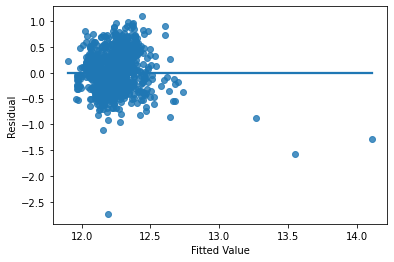

In [ ]:

sns.regplot(x = final2.fittedvalues, y = final2.resid, ci = None) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### **Constant Variablity y-axis** - The condition is still slightly off but this model might be preferred since it is closer to being met the conditions than the last one.

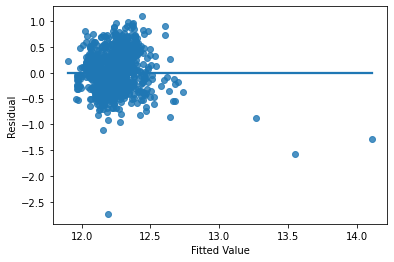

In [ ]:

sns.regplot(x = final2.fittedvalues, y = final2.resid, ci = None) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### **3. Normality or residuals condition** -  It does not appear exactly normal but is still quite close to being a normal than the last one and hence I'll proceed with this model.

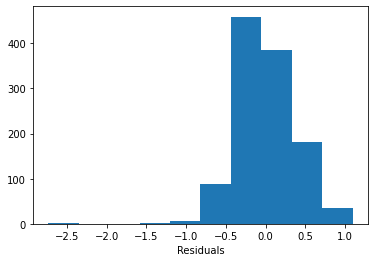

In [ ]:
plt.hist(final2.resid)
plt.xlabel('Residuals')
plt.show()

#### Since the second model shows a stretch in the data points, I would like to proceed with this model. Even though the conditions aren't fully met but I would like to proceed with caution for this. 

### Predictions 
#### Below are the details of the house for which we want to make predicitions for:

#### 1. The house has a Lot.Frontage of 80.
#### 2. The house has a Lot.Area of 5120.
#### 3. The house is located on Pave Street.
#### 4. It was sold in the year 2008.

In [ ]:
predicted = final2.predict(exog=dict(Lot_Frontage = 80, Lot_Area = 5120, Street = 'Pave', Yr_Sold = 2008))
predicted

0    12.212796
dtype: float64

In [ ]:
np.exp(predicted)

0    201349.142035
dtype: float64

#### Hence, the predicted Sale Price of house bought in 2008 is 164956.65.

### Conducting the Test to check whether a slope is non-zero or not 


##### **Note: Since we have already checked the conditions above, I'll proceed with them**. 

In [ ]:
final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_SalePrice   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     40.63
Date:                Fri, 13 May 2022   Prob (F-statistic):           7.03e-32
Time:                        14:22:18   Log-Likelihood:                -465.77
No. Observations:                1156   AIC:                             941.5
Df Residuals:                    1151   BIC:                             966.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.6448     16.387      1.504      0.133      -7.507      56.797
Street[T.Pave]     0.4407      0.258      1.710      0.087      -0.065       0.946
Yr_Sold           -0.0066      0.008     -0.806      0.420      -0.023       0.009
Lot_Frontage       0.0038      0.000      8.266      0.000       0.003       0.005
Lot_Area        7.816e-06   1.42e-06      5.518      0.000    5.04e-06    1.06e-05
==============================================================================
Omnibus:                       83.103   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.162
Skew:                          -0.204   Prob(JB):                     4.52e-73
Kurtosis:                       5.598   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The test-statistic and p-value from the summary table are as follows for all the individual slopes

$H_0: \beta_{Street[T.Pave]} =0$   

$H_A:$ $\beta_{Street[T.Pave]}\neq 0$ 

#### Hypothesis test for Slope 1

In [ ]:
test_stat1 = 1.710
print('test statistic for slope', test_stat1)
pvalue1 = 0.087
print('p-value', pvalue)

test statistic for slope 1.71
p-value 0.0


### Conclusion

Because the $p-value= 0.087 > alpha=0.05$, we fail to reject our null hypothesis. Thus, there is suffificient evidence to suggest that the population slopes in the model predicting Sale Price with Street as one of the explanatory variable could be zero. 


#### Hypothesis test for Slope 2

$H_0: \beta_{Yr.Sold}=0$   

$H_A:$ $\beta_{Yr.Sold}\neq 0$ 

In [ ]:
test_stat2 = 	-0.806
print('test statistic for slope', test_stat2)
pvalue2 = 0.420
print('p-value', pvalue2)

test statistic for slope -0.806
p-value 0.42


### Conclusion

Because the $p-value= 0.42 > alpha=0.05$, we fail to reject the null hypothesis. Thus there is suffificient evidence to suggest that the population slopes in the model predicting Sale Price can have the yr.sold slope as 0. 


#### Hypothesis test for Slope 3

$H_0: \beta_{Lot.Frontage}=0$   

$H_A:$ $\beta_{Lot.Frontage}\neq 0$ 

In [ ]:
test_stat3 = 	8.266
print('test statistic for slope', test_stat3)
pvalue3 = 0.000
print('p-value', pvalue3)

test statistic for slope 8.266
p-value 0.0


### Conclusion

#### Because the $p-value= 0.000 < alpha=0.05$, we can reject the null hypothesis. As there is suffificient evidence to suggest that the population slopes is not zero i.e β not equal to 0 for lot.frontage 


#### Hypothesis test for Slope 4

$H_0: \beta_{Lot.Area}=0$   

$H_A:$ $\beta_{Lot.Area}\neq 0$ 

In [ ]:
test_stat4 = 5.518
print('test statistic for slope', test_stat4)
pvalue4 = 0.000
print('p-value', pvalue4)

test statistic for slope 5.518
p-value 0.0


### Conclusion

#### Because the $p-value= 0.000 < alpha=0.05$, we reject the null hypothesis. Thus there is suffificient evidence to suggest that the population slopes is not zero i.e β not equal to 0. 

#### Hence, all the above conclusions suggest that Lot.Frontage and Lot.Area slopes are non-zero. And, Street and Yr_Sold have evidences that suggest it could be zero.

### **5. Logistic Regression**

**Research Question**: Is there any linear relationship  between the log-odds of the success level of Sale Condition and Lot Shape, Lot Area, Sale Price, Year Sold  and Street?

First, we would like to fit a logistic regression model that will predict the probability that a given the Sale Condition is normal ie. (y=1), given the following explanatory variables:

- Lot Shape

- Lot Area

- Sale Price

- Year Sold

- Street


####5.1 Fitting the model

In [ ]:
Ames_new['Sale_Condition'].value_counts()

Normal     929
Partial    154
Abnorml     49
Family      19
Alloca       5
Name: Sale_Condition, dtype: int64

In [ ]:
#define y 
Ames_new['y']=Ames_new['Sale_Condition'].map({'Normal': 1, 'Partial': 0, 'Abnorml':0, 'Family':0,'Alloca':0,'AdjLand':0 })
Ames_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Log_SalePrice,y
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,5,2010,WD,Normal,215000,12.278393,1
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,Normal,244000,12.404924,1
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,Normal,189900,12.154253,1
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,6,2010,WD,Normal,195500,12.183316,1
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,Normal,236500,12.373703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,923227100,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,...,0,0,0,5,2006,WD,Normal,140000,11.849398,1
2923,2924,923250060,20,RL,80.0,17400,Pave,Reg,Low,AllPub,...,0,0,0,5,2006,WD,Normal,160000,11.982929,1
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,9,2006,WD,Abnorml,131000,11.782953,0
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2006,WD,Normal,170000,12.043554,1


In [ ]:
#split data into trainning and test dataset
train, test = train_test_split(Ames_new, test_size = 0.20, random_state = 123)

####**SMALL Analytics Question:** Is the proportion of sale conditions are different for at least one of lot shape in this proportion?

In [ ]:
mod_full=smf.logit('y~SalePrice+Street+Lot_Area+Yr_Sold+Lot_Shape', data=train).fit()
mod_full.summary()

Optimization terminated successfully.
         Current function value: 0.450471
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  924
Model:                          Logit   Df Residuals:                      916
Method:                           MLE   Df Model:                            7
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.08362
Time:                        14:22:18   Log-Likelihood:                -416.24
converged:                       True   LL-Null:                       -454.22
Covariance Type:            nonrobust   LLR p-value:                 9.143e-14
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -568.0841    139.596     -4.069      0.000    -841.687    -294.481
Street[T.Pave]       1.7774      1.434      1.239      0.215      -1.034       4.588
Lot_Shape[T.IR2]     0.4925      0.614      0.802      0.422      -0.711       1.696
Lot_Shape[T.IR3]    -0.6688      0.937     -0.713      0.476      -2.506       1.169
Lot_Shape[T.Reg]    -0.0519      0.185     -0.280      0.779      -0.415       0.311
SalePrice        -6.651e-06   9.43e-07     -7.051      0.000    -8.5e-06    -4.8e-06
Lot_Area          6.627e-06    1.1e-05      0.601      0.548    -1.5e-05    2.82e-05
Yr_Sold              0.2836      0.070      4.076      0.000       0.147       0.420
====================================================================================
"""

In [ ]:
mod_red=smf.logit('y~SalePrice+Street+Lot_Area+Yr_Sold', data=train).fit()
mod_red.summary()

Optimization terminated successfully.
         Current function value: 0.451220
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  924
Model:                          Logit   Df Residuals:                      919
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.08210
Time:                        14:22:18   Log-Likelihood:                -416.93
converged:                       True   LL-Null:                       -454.22
Covariance Type:            nonrobust   LLR p-value:                 2.446e-15
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -566.7128    139.044     -4.076      0.000    -839.234    -294.192
Street[T.Pave]     1.7718      1.431      1.238      0.216      -1.033       4.577
SalePrice      -6.461e-06   9.16e-07     -7.051      0.000   -8.26e-06   -4.67e-06
Lot_Area        5.278e-06   1.09e-05      0.486      0.627    -1.6e-05    2.66e-05
Yr_Sold            0.2828      0.069      4.083      0.000       0.147       0.419
==================================================================================
"""

####5.2 Model Selection with AIC and BIC

In [ ]:
#aic
print('Full Model AIC:',mod_full.aic)
print('Reduced Model AIC:',mod_red.aic)

Full Model AIC: 848.4709846029983
Reduced Model AIC: 843.8546243737455


In [ ]:
#bic
print('Full Model BIC:',mod_full.bic)
print('Reduced Model BIC:',mod_red.bic)

Full Model BIC: 887.1006811761318
Reduced Model BIC: 867.998184731954


We can see that the reduced model had a lower BIC and a similar AIC score than the full model does. Therefore, the regression models gave us some useful insights as to which explanatory variables to leave out of our reduced model(s). Then I chosed the reduced model as my final parsimonious model.

####5.3 Final parsimonious model  

In [ ]:
mod_final=smf.logit('y~SalePrice+Street+Lot_Area+Yr_Sold', data=train).fit()
mod_final.summary()

Optimization terminated successfully.
         Current function value: 0.451220
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  924
Model:                          Logit   Df Residuals:                      919
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.08210
Time:                        14:22:18   Log-Likelihood:                -416.93
converged:                       True   LL-Null:                       -454.22
Covariance Type:            nonrobust   LLR p-value:                 2.446e-15
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -566.7128    139.044     -4.076      0.000    -839.234    -294.192
Street[T.Pave]     1.7718      1.431      1.238      0.216      -1.033       4.577
SalePrice      -6.461e-06   9.16e-07     -7.051      0.000   -8.26e-06   -4.67e-06
Lot_Area        5.278e-06   1.09e-05      0.486      0.627    -1.6e-05    2.66e-05
Yr_Sold            0.2828      0.069      4.083      0.000       0.147       0.419
==================================================================================
"""

#### Logistic Equation

$ln(\frac{\hat{p}}{1-\hat{p}}) = -566.7128 +1.7718Street[T.Pave] 	-6.461e-06SalePrice +	5.278e-06Lot_Area + 0.2828Yr_Sold$




#### 5.4 Hypothesis Testing for the Population Slope

#### SalePrice

$H_0: \beta_{SalePrice} =0$

$H_A: \beta_{SalePrice} \neq 0$

###### Test statistic

In [ ]:
point_estimate = -6.461e-06
standard_error = 9.16e-07
null_value=0

test_statistic = (point_estimate-null_value)/standard_error
test_statistic

-7.053493449781659

###### p-value

In [ ]:
pvalue = 2*(1- norm.cdf(np.abs(test_statistic)))
pvalue

1.744826505500896e-12

###### Conclusion

Because $p-value=1.744826505500896e-12 < \alpha=0.01$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the slope for SalePrice is non-zero in the population logistic regression model.

Street

$H_0: \beta_{Street} =0$

$H_A: \beta_{Street} \neq 0$

Test statistic for street

In [ ]:
point_estimate1 = 1.7718
standard_error1 = 1.431
null_value=0

test_statistic1 = (point_estimate1-null_value)/standard_error1
test_statistic1

1.2381551362683438

p-value for street

In [ ]:
pvalue1 = 2*(1- norm.cdf(np.abs(test_statistic1)))
pvalue1

0.21565854302479504

Conclusion for street

Because $p-value=0.21565854302479504 > \alpha=0.01$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the slope for SalePrice is non-zero in the population logistic regression model.

Lot Area

$H_0: \beta_{LotArea} =0$

$H_A: \beta_{LotArea} \neq 0$

Test statistic for LotArea

In [ ]:
point_estimate2 = 5.278e-06
standard_error2 = 1.09e-05
null_value=0

test_statistic2 = (point_estimate2-null_value)/standard_error2
test_statistic2

0.4842201834862385

p-value for Lot Area

In [ ]:
pvalue2= 2*(1- norm.cdf(np.abs(test_statistic2)))
pvalue2

0.628229614231566

Conclusion for Lot Area

Because $p-value=0.628229614231566 > \alpha=0.01$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the slope for SalePrice is non-zero in the population logistic regression model.

Year Sold

$H_0: \beta_{YearSold} =0$

$H_A: \beta_{YearSold} \neq 0$

Test statistic for Year Sold

In [ ]:
point_estimate3 = 0.2828
standard_error3 = 0.069
null_value=0

test_statistic3 = (point_estimate3-null_value)/standard_error3
test_statistic3

4.098550724637681

p-value for Year Sold

In [ ]:
pvalue3= 2*(1- norm.cdf(np.abs(test_statistic3)))
pvalue3

4.157451338882012e-05

Conclusion for Year Sold

Because $p-value=4.157451338882012e-05 < \alpha=0.01$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the slope for SalePrice is non-zero in the population logistic regression model.

In [ ]:
phat_test = mod_final.predict(exog = test[['SalePrice','Street','Lot_Area','Yr_Sold']])
phat_test.head()

547     0.929538
2463    0.687303
369     0.897121
2309    0.780795
1466    0.850627
dtype: float64

In [ ]:
test['phat_test'] = phat_test
test

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Log_SalePrice,y,phat_test
547,548,531452010,160,RL,75.0,10762,Pave,Reg,Lvl,AllPub,...,0,0,4,2009,WD,Normal,120000,11.695247,1,0.929538
2463,2464,528480070,60,FV,84.0,10728,Pave,Reg,Lvl,AllPub,...,0,0,8,2006,New,Partial,266000,12.491252,0,0.687303
369,370,527276160,60,RL,85.0,11900,Pave,Reg,Lvl,AllPub,...,0,0,7,2009,WD,Normal,185000,12.128111,1,0.897121
2309,2310,526354020,20,RL,90.0,11727,Pave,Reg,Lvl,AllPub,...,0,0,3,2006,WD,Normal,192100,12.165771,1,0.780795
1466,1467,907265100,60,RL,96.0,11690,Pave,IR1,Lvl,AllPub,...,0,0,6,2008,WD,Normal,207000,12.240474,1,0.850627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1824,532376090,20,RL,40.0,13673,Pave,IR1,Lvl,AllPub,...,0,0,3,2007,WD,Normal,143900,11.876874,1,0.867019
2600,2601,535379100,30,RL,60.0,10800,Pave,Reg,Lvl,AllPub,...,0,0,6,2006,WD,Normal,120000,11.695247,1,0.849575
2095,2096,906223040,60,RL,75.0,9317,Pave,Reg,Lvl,AllPub,...,0,0,7,2007,CWD,Normal,220000,12.301383,1,0.795786
2129,2130,907187060,60,RL,43.0,12352,Pave,IR2,Lvl,AllPub,...,0,0,3,2007,WD,Normal,217000,12.287653,1,0.801479


ROC and AUC

In [ ]:
fprs, tprs ,thresholds = roc_curve(y_true = test['y'], y_score = test['phat_test'])
auc = roc_auc_score(y_true = test['y'],
                    y_score = test['phat_test'])

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

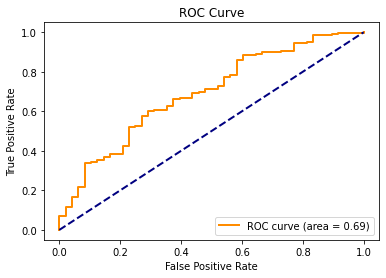

In [ ]:
plot_roc(fprs,tprs,auc)

**Research Goal**: How do we find the good probability threshold on plots? 

Since that the good probability threshold has a largest difference between FPR anf TPR, then we have 2 options below:

#### <u>Option 1</u>: About (FPR = 0.4, TPR = 0.6)

Notice how that at a FPR of 0.4, the TPR starts to level off in the ROC curve above. By increasing the FPR any more past 0.4, we do not gain much more in the way of a better (higher) TPR. So we could choose the predictive probability threshold that gives us this combination of (FPR = 0.4, TPR = 0.6).

#### <u>Option 2</u>:  About (FPR = 0.7, TPR = 0.9) 

Notice how that at a TPR of 0.9, the FPR starts to level off in the ROC curve above. By decreasing the TPR any more past 0.9, we do not gain much more in the way of a better (lower) FPR. So we could choose the predictive probability threshold that gives us this combination of (FPR = 0.7, TPR = 0.9).


####5.4 Classification of the test dataset

In [ ]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [ ]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(test['y'], test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr  fpr
0       0.13  1.0  1.0
   threshold  tpr  fpr
0       0.14  1.0  1.0
   threshold  tpr  fpr
0       0.15  1.0  1.0
   threshold  tpr  fpr
0       0.16  1.0  1.0
   threshold  tpr  fpr
0       0.17  1.0  1.0
   threshold  tpr  fpr
0       0.18  1.0  1.0
   threshold  tpr  fpr
0       0.19  1.0  1.0
   threshold  tpr  fpr
0        0.2  1.0  1.0
   threshold  tpr  fpr
0       0.2

<u>Option 1</u>: It looks like a predictive probability threshold of  $p_0=0.82$ will gve us a tpr=0.640816 and a fpr=0.427083.     

<u>Option 2</u>: It looks like a predictive probability threshold of  $p_0=0.77$ will gve us a tpr=0.895918 and a fpr=0.708333.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

### Summarization

#### **Descriptive Analysis** - The idea behind descriptive analysis was to understand the variable Sale Price and know its summary Statistics. It was important to know this as we were further going to determine its relationship with two varible one of which was Categorical (Sale condition) and the other one was a discrete numerical variable (Year Sold). Hence, to know the strength of the relationship of these 3 variables we plotted a boxplot as a scatterplot didn't give much clear result. We found that there was a significantly strong association between the three variables as all their median values are different. 



#### **Inference Research** - From the Inference research, we was trying to determine if we have sufficient evidence to suggest that the average sales price of all property sold in Iowa in REG lot.shape is different from the average sales price of all property sold in Iowa in IR1 lot.shape. As the result, we can found that the null value is not inside 95% confidence interval and the p-value is 0.0 which means that we can get a difference sales price between two different lot shape from our dataset.



#### **Linear Regression** - Next, we did built a linear regression model. The motive behind this model was to judge how variables like lot Frontage, Lot Area, the street, and year in which the house was sold would affect it's selling price. There was somewhat strong asociation between all the varibles. However, to increase the confidence in our results we proceeded with the model including linear transformation of the response variable (Saleprice). In the end, we made predictions based on this model and also checked whether we have enough evidence to suggest whether we our slopes are non zero or not. The results suggested that the Lot.Frontage and Lot.Area slope could be non zero and street and Yr.sold slope could be zero.

#### **Logistic regression** - From the Logistic research, we was trying to find linear relationship between the log-odds of the success level of Sale Condition and Lot Shape, Lot Area, Sale Price, Year Sold and Street. In order to find our final parsimonious model, we reduced the variable Lot Shape by using AIC and BIC. After that ,we did the hypothesis testing for all slopes in our model and got that Sales Price and Year Sold slopes are non-zero. Then we used ROC and AUC graph found the good predictive probability threshold for our test dataset. In the end, we did the classification of our test dataset by sorting the best points(greatest difference between FPR and TPR) on the graph.




### **Future Work**:
#### Someone else who wishes to explore this datatset further could see how the utilities like fence or pools provided with house affect its price. To understand this, one could take the help of descriptive analysis and linear or logistic regression.
